# Analiza wielowymiarowa

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [72]:
df = pd.read_csv('auto-cleaned.csv')
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Numeryczna analiza dwuwymiarowa

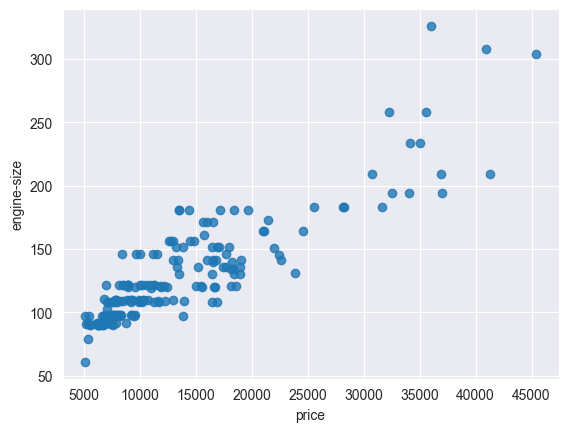

In [73]:
sns.regplot(data=df, x='price', y='engine-size', fit_reg=False)
plt.show()

In [74]:
corr = np.round(df.corr(numeric_only=True), 2)
price_corr = corr['price'].sort_values(ascending=False)
price_corr

price                1.00
engine-size          0.89
curb-weight          0.84
horsepower           0.81
width                0.75
length               0.70
wheel-base           0.58
bore                 0.55
height               0.14
stroke               0.10
compression-ratio    0.07
symboling           -0.08
peak-rpm            -0.10
city-mpg            -0.71
highway-mpg         -0.72
Name: price, dtype: float64

### Heterogeniczność i stratyfikacja

In [75]:
df['body-style'].value_counts()

body-style
sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: count, dtype: int64

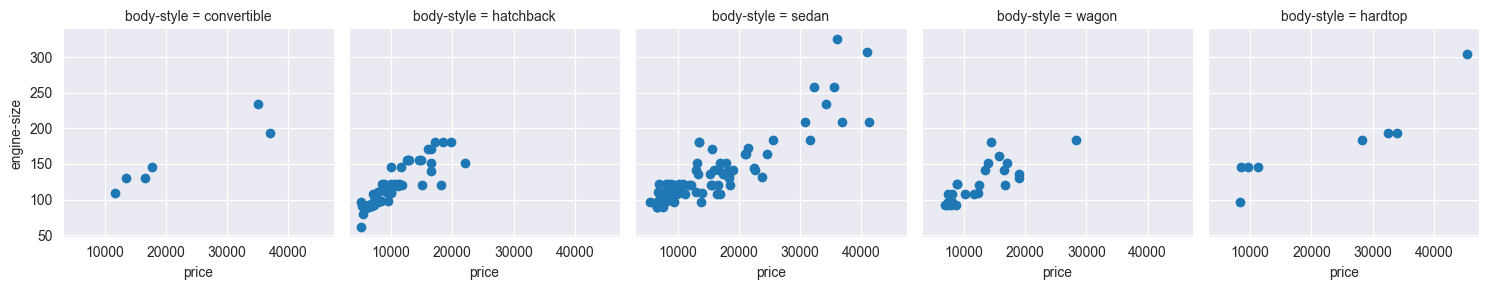

In [76]:
sns.FacetGrid(data=df, col='body-style').map(plt.scatter, 'price', 'engine-size').add_legend()
plt.show()

In [77]:
bodies = df['body-style'].unique()

for body in bodies:
    print(f'\n{body}')
    print(df.loc[df['body-style'] == body, ['price', 'engine-size']].corr())


convertible
                price  engine-size
price        1.000000     0.940052
engine-size  0.940052     1.000000

hatchback
                price  engine-size
price        1.000000     0.883585
engine-size  0.883585     1.000000

sedan
                price  engine-size
price        1.000000     0.887003
engine-size  0.887003     1.000000

wagon
                price  engine-size
price        1.000000     0.794619
engine-size  0.794619     1.000000

hardtop
                price  engine-size
price        1.000000     0.906567
engine-size  0.906567     1.000000


### Analiza dwuwymiarowa kategoryczna 

In [78]:
crosstab = pd.crosstab(df['body-style'], df['num-of-cylinders'])
crosstab

num-of-cylinders,eight,five,four,six,three,twelve
body-style,,,,,,
convertible,1,0,4,1,0,0
hardtop,1,1,4,2,0,0
hatchback,0,0,56,6,1,0
sedan,2,7,69,13,0,1
wagon,0,2,20,2,0,0


In [79]:
# Przykład przy użyciu pandas
crosstab = pd.crosstab(df['body-style'], df['num-of-cylinders'])
crosstab_normalised = crosstab.apply(lambda x: x/x.sum(), axis=1)
round(crosstab_normalised, 2)

num-of-cylinders,eight,five,four,six,three,twelve
body-style,,,,,,
convertible,0.17,0.00,0.67,0.17,0.00,0.00
hardtop,0.12,0.12,0.50,0.25,0.00,0.00
hatchback,0.00,0.00,0.89,0.10,0.02,0.00
sedan,0.02,0.08,0.75,0.14,0.00,0.01
wagon,0.00,0.08,0.83,0.08,0.00,0.00


In [80]:
# Przykład przy użyciu groupby
grouped_table = df.groupby(['body-style', 'num-of-cylinders']).size()
grouped_table_normalised = grouped_table.unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)
round(grouped_table_normalised, 2)

num-of-cylinders,eight,five,four,six,three,twelve
body-style,,,,,,
convertible,0.17,0.00,0.67,0.17,0.00,0.00
hardtop,0.12,0.12,0.50,0.25,0.00,0.00
hatchback,0.00,0.00,0.89,0.10,0.02,0.00
sedan,0.02,0.08,0.75,0.14,0.00,0.01
wagon,0.00,0.08,0.83,0.08,0.00,0.00


### Mieszana analiza dwuwymiarowa danych liczbowych i kategorycznych

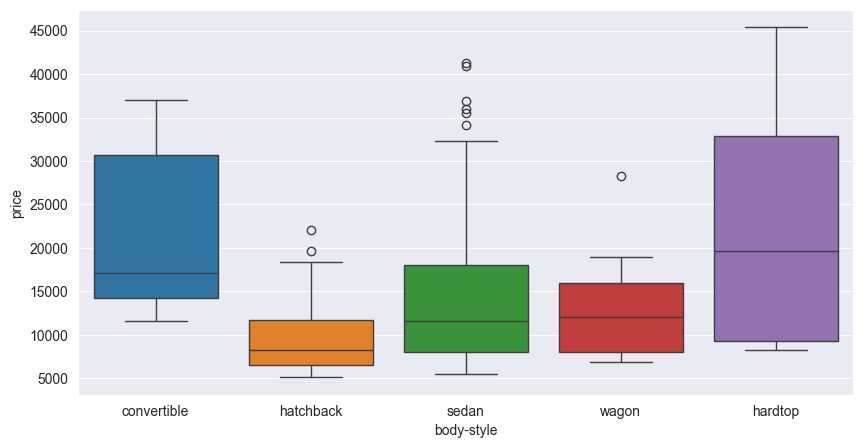

In [81]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['body-style'], y=df['price'], hue=df['body-style'])
plt.show()

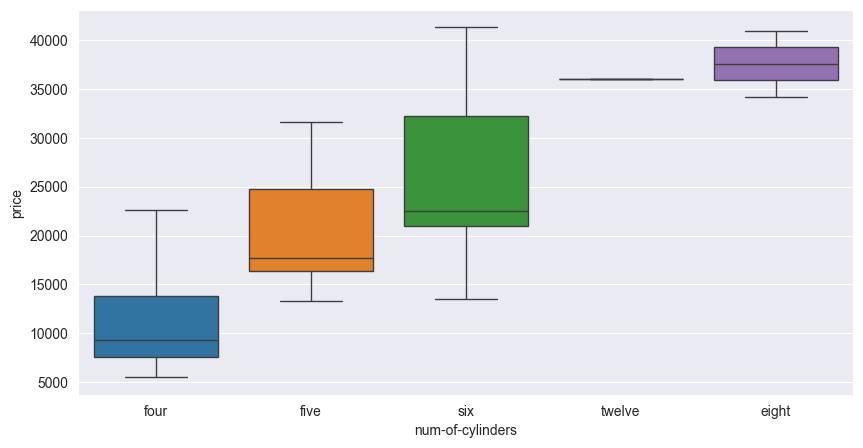

In [82]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df[df['body-style'] == 'sedan']['num-of-cylinders'], y=df[df['body-style'] == 'sedan']['price'], hue=df[df['body-style'] == 'sedan']['num-of-cylinders'])
plt.show()